In [1]:
import torch
import os

In [2]:
import numpy as np
import torchvision

def load_data():
    transform = torchvision.transforms.Compose(
        [torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

    return trainset, testset, 

trainset, testset = load_data()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=False, num_workers=2) 
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False, num_workers=2) # Shuffle = False!

Files already downloaded and verified
Files already downloaded and verified


In [3]:
models_root = 'dl_trained_models'

model_architectures = os.listdir(models_root)
model_architectures

['resnet18_not_pretrained', 'resnet18_pretrained', 'simple_cnn', 'simple_nn']

In [4]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

def load_saved_models_from_architecture(model_architecture_name, device):
    trained_models_files = os.listdir(os.path.join(models_root, model_architecture_name))
    trained_models_files = [os.path.join(models_root, model_architecture_name, f) for f in trained_models_files]
    trained_models = [torch.load(file, map_location=device) for file in trained_models_files]
    return trained_models

In [5]:
from models.ensemble import ModelsEnsemble

def get_labels_from_loader(loader):
    labels_list = []
    for _, labels in loader:
        labels_list.append(labels)
    labels_array = torch.cat(labels_list)
    return labels_array

def compute_model_accuracy(model, loader, device):
    labels_list = []
    model_predictions = []
    for images, labels in loader:
        labels_list.append(labels)
        images = images.to(device)
        outputs = model.predict(images).cpu()
        model_predictions.append(outputs)
    labels_array = torch.cat(labels_list)
    model_predictions = torch.cat(model_predictions)
    model_accuracy = (model_predictions == labels_array).sum().item() / len(labels_array)
    return model_accuracy

def print_accuracies(models, trainloader, testloader, device, create_ensemble = False):
    print("Accuracies: \t train / test")
    for i, model in enumerate(models):
        model_accuracy_train = compute_model_accuracy(model, trainloader, device)
        model_accuracy_test = compute_model_accuracy(model, testloader, device)
        print(f'Model {i+1} accuracy: {model_accuracy_train:5.3f} / {model_accuracy_test:5.3f}')
    
    if create_ensemble is True:
        ensemble = ModelsEnsemble(models)

        labels_train = get_labels_from_loader(trainloader)
        ensemble_predictions_train = ensemble.predict(trainloader, device)
        ensemble_accuracy_train = (ensemble_predictions_train == labels_train).sum().item() / len(labels_train)
        
        labels_test = get_labels_from_loader(testloader)
        ensemble_predictions_test = ensemble.predict(testloader, device)
        ensemble_accuracy_test = (ensemble_predictions_test == labels_test).sum().item() / len(labels_test)
        print(f'Ensemble accuracy: {ensemble_accuracy_train:5.3f} / {ensemble_accuracy_test:5.3f}')

In [6]:
for architecture_name in model_architectures:
    print(f"\nAnalysing {architecture_name} models")
    loaded_models = load_saved_models_from_architecture(architecture_name, device)
    print_accuracies(loaded_models, trainloader, testloader, device, create_ensemble = True)


Analysing resnet18_not_pretrained models
Accuracies: 	 train / test
Model 1 accuracy: 0.789 / 0.652
Model 2 accuracy: 0.773 / 0.647
Model 3 accuracy: 0.774 / 0.648
Model 4 accuracy: 0.773 / 0.649
Model 5 accuracy: 0.774 / 0.647
Ensemble accuracy: 0.804 / 0.670

Analysing resnet18_pretrained models
Accuracies: 	 train / test
Model 1 accuracy: 0.885 / 0.791
Model 2 accuracy: 0.881 / 0.780
Model 3 accuracy: 0.883 / 0.777
Model 4 accuracy: 0.882 / 0.784
Model 5 accuracy: 0.883 / 0.781
Ensemble accuracy: 0.899 / 0.794

Analysing simple_cnn models
Accuracies: 	 train / test
Model 1 accuracy: 0.649 / 0.611
Model 2 accuracy: 0.646 / 0.612
Model 3 accuracy: 0.664 / 0.622
Model 4 accuracy: 0.646 / 0.598
Model 5 accuracy: 0.652 / 0.611
Ensemble accuracy: 0.670 / 0.624

Analysing simple_nn models
Accuracies: 	 train / test
Model 1 accuracy: 0.607 / 0.521
Model 2 accuracy: 0.610 / 0.525
Model 3 accuracy: 0.611 / 0.522
Model 4 accuracy: 0.608 / 0.523
Model 5 accuracy: 0.606 / 0.516
Ensemble accurac

In [9]:
# Analysing resnet18_not_pretrained models
# Accuracies: 	 train / test
# Model 1 accuracy: 0.789 / 0.652
# Model 2 accuracy: 0.773 / 0.647
# Model 3 accuracy: 0.774 / 0.648
# Model 4 accuracy: 0.773 / 0.649
# Model 5 accuracy: 0.774 / 0.647
# Ensemble accuracy: 0.804 / 0.670

resnet_not_pretrained = np.array([[0.789, 0.773, 0.774, 0.773, 0.774, 0.804],[0.652, 0.647, 0.648, 0.649, 0.647, 0.670]])

# Analysing resnet18_pretrained models
# Accuracies: 	 train / test
# Model 1 accuracy: 0.885 / 0.791
# Model 2 accuracy: 0.881 / 0.780
# Model 3 accuracy: 0.883 / 0.777
# Model 4 accuracy: 0.882 / 0.784
# Model 5 accuracy: 0.883 / 0.781
# Ensemble accuracy: 0.899 / 0.794

resnet_pretrained = np.array([[0.885, 0.881, 0.883, 0.882, 0.883, 0.899],[0.791, 0.780, 0.777, 0.784, 0.781, 0.794]])

# Analysing simple_cnn models
# Accuracies: 	 train / test
# Model 1 accuracy: 0.649 / 0.611
# Model 2 accuracy: 0.646 / 0.612
# Model 3 accuracy: 0.664 / 0.622
# Model 4 accuracy: 0.646 / 0.598
# Model 5 accuracy: 0.652 / 0.611
# Ensemble accuracy: 0.670 / 0.624

simple_cnn = np.array([[0.649, 0.646, 0.664, 0.646, 0.652, 0.670],[0.611, 0.612, 0.622, 0.598, 0.611, 0.624]])

# Analysing simple_nn models
# Accuracies: 	 train / test
# Model 1 accuracy: 0.607 / 0.521
# Model 2 accuracy: 0.610 / 0.525
# Model 3 accuracy: 0.611 / 0.522
# Model 4 accuracy: 0.608 / 0.523
# Model 5 accuracy: 0.606 / 0.516
# Ensemble accuracy: 0.615 / 0.522

simple_nn = np.array([[0.607, 0.610, 0.611, 0.608, 0.606, 0.615],[0.521, 0.525, 0.522, 0.523, 0.516, 0.522]])

In [8]:
one_model_from_each_architecture = []
for architecture_name in model_architectures:
    loaded_models = load_saved_models_from_architecture(architecture_name, device)
    one_model_from_each_architecture.append(loaded_models[0])

print('Analysed models: ')
print(model_architectures)
print_accuracies(one_model_from_each_architecture, trainloader, testloader, device, create_ensemble = True)

Analysed models: 
['resnet18_not_pretrained', 'resnet18_pretrained', 'simple_cnn', 'simple_nn']
Accuracies: 	 train / test
Model 1 accuracy: 0.789 / 0.652
Model 2 accuracy: 0.885 / 0.791
Model 3 accuracy: 0.649 / 0.611
Model 4 accuracy: 0.607 / 0.521
Ensemble accuracy: 0.815 / 0.721


In [10]:
# Accuracies: 	 train / test
# Model 1 accuracy: 0.789 / 0.652
# Model 2 accuracy: 0.885 / 0.791
# Model 3 accuracy: 0.649 / 0.611
# Model 4 accuracy: 0.607 / 0.521
# Ensemble accuracy: 0.815 / 0.721

one_model_from_each_architecture = np.array([[0.789, 0.885, 0.649, 0.607, 0.0, 0.815],[0.652, 0.791, 0.611, 0.521, 0.0, 0.721]])

In [15]:
import pandas as pd

df = pd.DataFrame(np.concatenate((resnet_not_pretrained, resnet_pretrained, simple_cnn, simple_nn, one_model_from_each_architecture), axis=0),
                    index=['resnet_not_pretrained_train', 'resnet_not_pretrained_test', 'resnet_pretrained_train',
                           'resnet_pretrained_test', 'simple_cnn_train', 'simple_cnn_test', 'simple_nn_train', 'simple_nn_test', 
                           'one_model_from_each_architecture_train', 'one_model_from_each_architecture_test'],
                    columns=['model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'ensemble'])

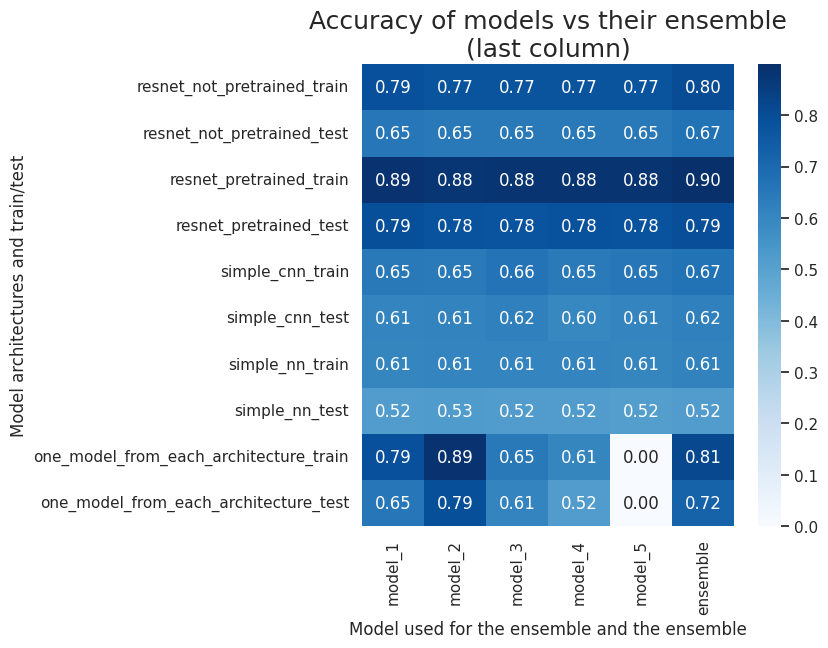

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
sns.set_theme(style="whitegrid")
sns.heatmap(df, annot=True, fmt='.2f', cmap='Blues', ax=ax)
# set labels and title
ax.set_xlabel('Model used for the ensemble and the ensemble')
ax.set_ylabel('Model architectures and train/test')
ax.set_title('Accuracy of models vs their ensemble\n(last column)', fontsize=18)
fig.savefig('accuracy_heatmap.png', dpi=450, bbox_inches='tight')
plt.show()
